In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
games_df = pd.read_csv('vgsales.csv')

print("Games Statistics:")
print(games_df.describe())

Games Statistics:
               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.04000

In [4]:
print(games_df.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [5]:
print(games_df.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


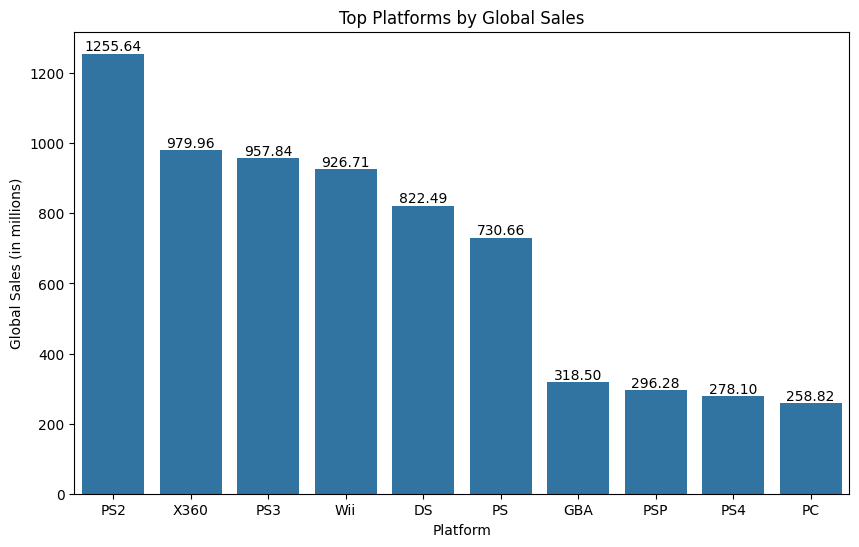

In [6]:
# Insight 1: Platform Dominance
top_platforms = games_df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_platforms.index, y=top_platforms.values)
plt.title('Top Platforms by Global Sales')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
for index, value in enumerate(top_platforms.values):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.show()

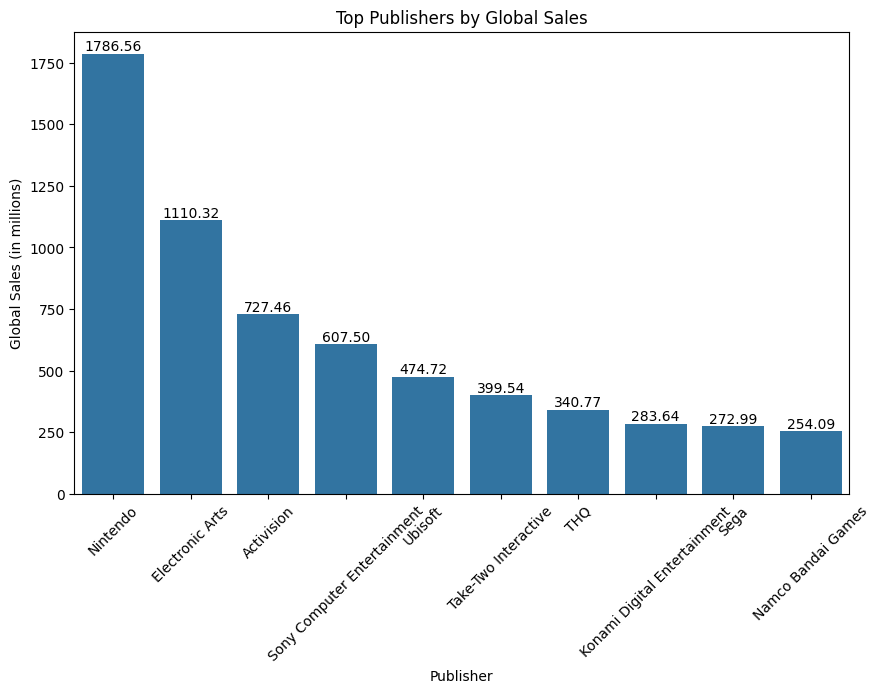

In [7]:
# Insight 2: Publisher Sales
top_publishers = games_df.dropna(subset=['Publisher']).groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.title('Top Publishers by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
for index, value in enumerate(top_publishers.values):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.show()

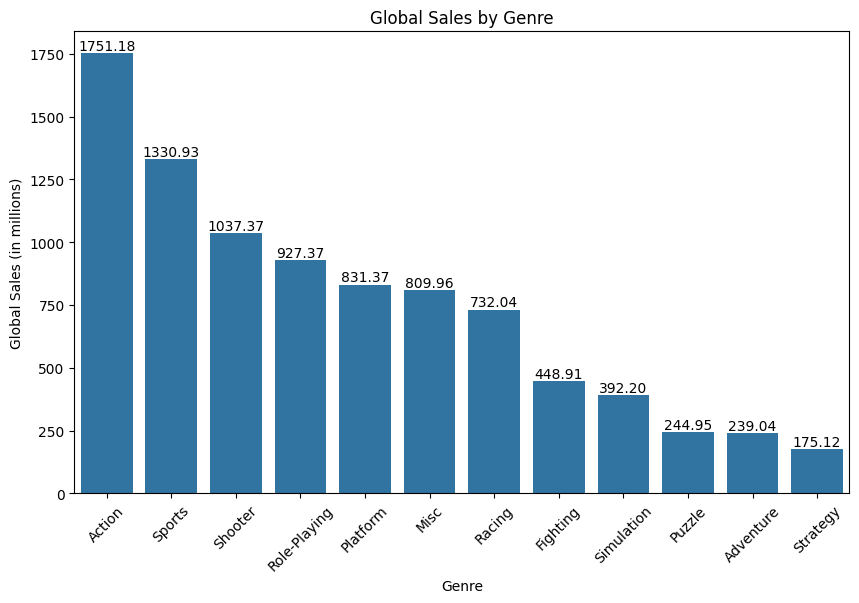

In [8]:
# Insight 3 : Genre Popularity
genre_sales = games_df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.title('Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
for index, value in enumerate(genre_sales.values):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.show()

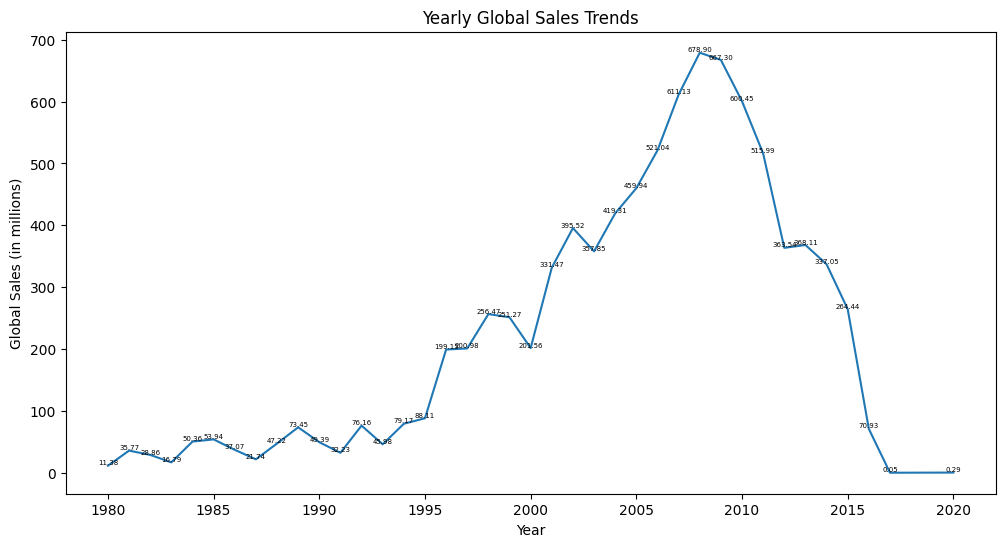

In [9]:
# Insight 4 : Sales Trends
yearly_sales = games_df.dropna(subset=['Year']).groupby('Year')['Global_Sales'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Yearly Global Sales Trends')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
for x, y in zip(yearly_sales.index, yearly_sales.values):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize = 5)
plt.show()

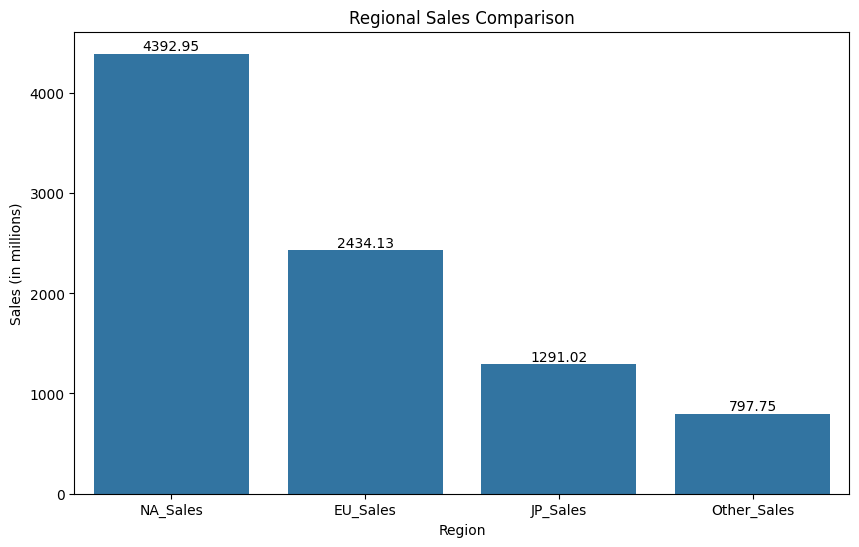

In [10]:
# Insight 5 : Regional Preferences
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
regional_sales = games_df[regions].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=regional_sales.index, y=regional_sales.values)
plt.title('Regional Sales Comparison')
plt.xlabel('Region')
plt.ylabel('Sales (in millions)')
for index, value in enumerate(regional_sales.values):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.show()

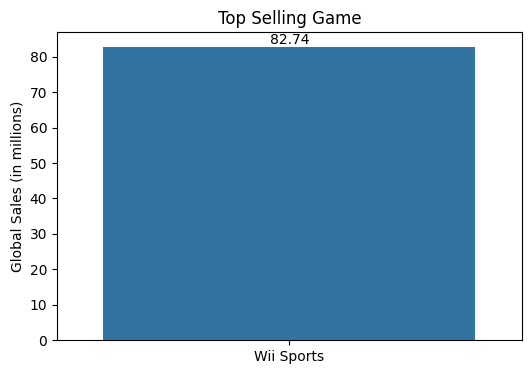

In [11]:
# Insight 6 : Top Game
top_game = games_df.loc[games_df['Global_Sales'].idxmax()]
plt.figure(figsize=(6, 4))
sns.barplot(x=[top_game['Name']], y=[top_game['Global_Sales']])
plt.title('Top Selling Game')
plt.ylabel('Global Sales (in millions)')
plt.text(0, top_game['Global_Sales'], f'{top_game["Global_Sales"]:.2f}', ha='center', va='bottom')
plt.show()

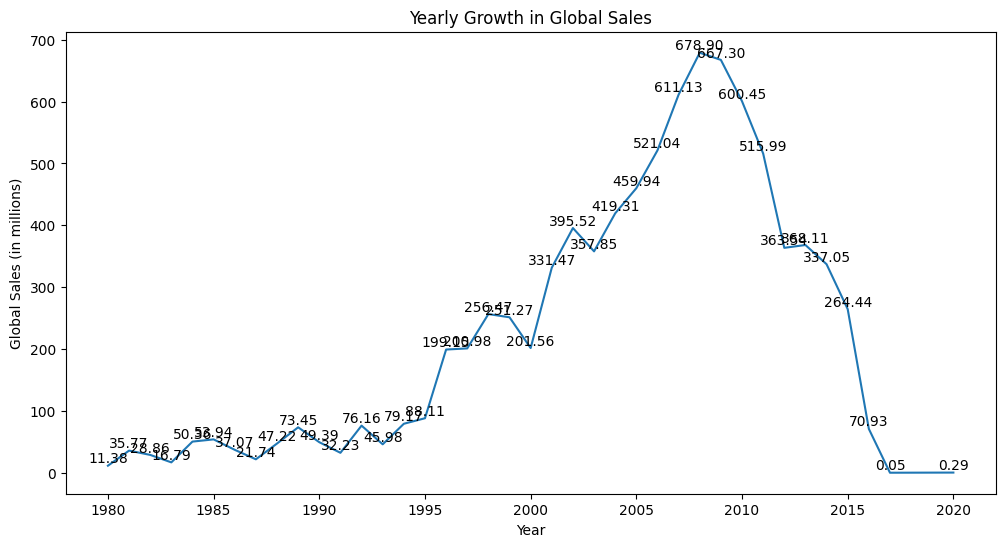

In [12]:
# Insight 7 : Yearly Growth
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Yearly Growth in Global Sales')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
for x, y in zip(yearly_sales.index, yearly_sales.values):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')
plt.show()

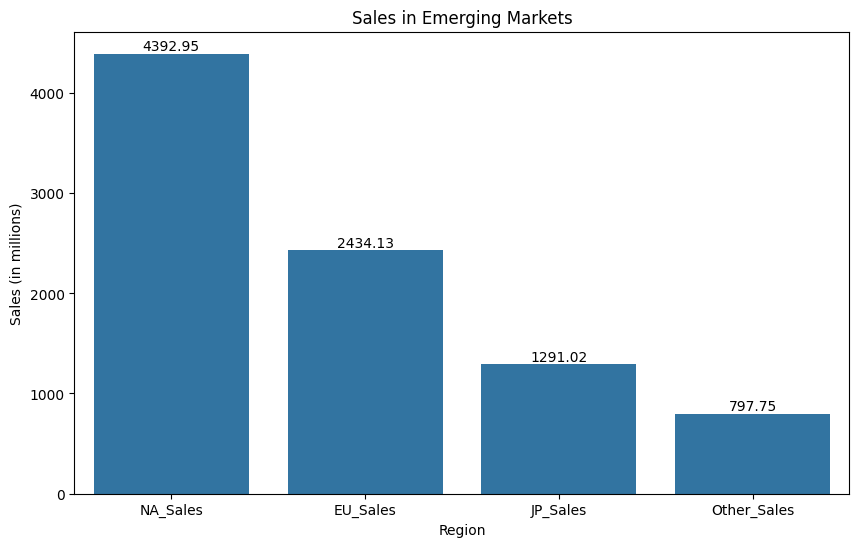

In [13]:
# Insight 8 : Emerging Markets
plt.figure(figsize=(10, 6))
sns.barplot(x=regional_sales.index, y=regional_sales.values)
plt.title('Sales in Emerging Markets')
plt.xlabel('Region')
plt.ylabel('Sales (in millions)')
for index, value in enumerate(regional_sales.values):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.show()

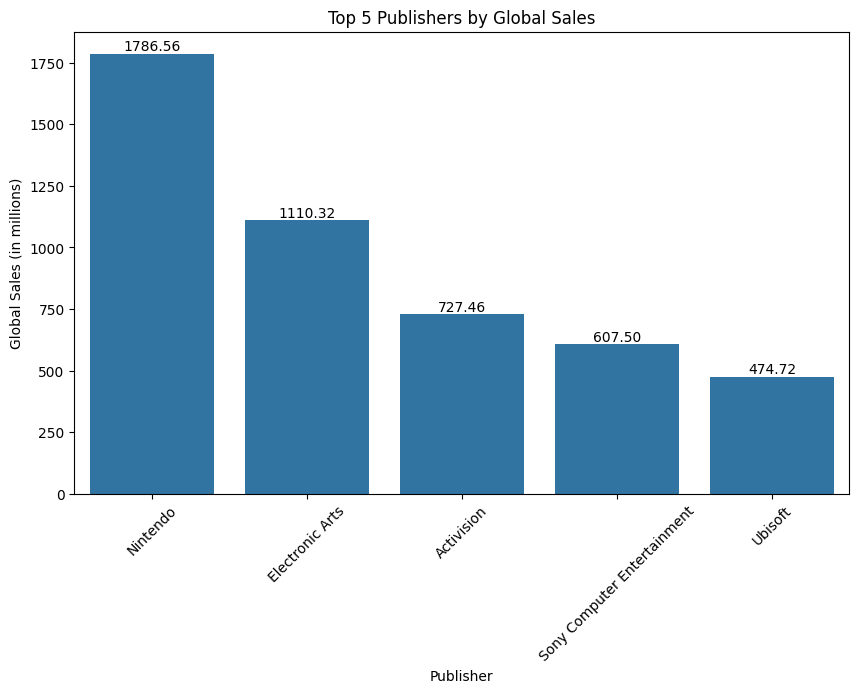

In [15]:
# Insight 9: Publisher Diversity
diverse_publishers = games_df.dropna(subset=['Publisher']).groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=diverse_publishers.index, y=diverse_publishers.values)
plt.title('Top 5 Publishers by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
for index, value in enumerate(diverse_publishers.values):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.show()